In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

file_path ="/content/drive/My Drive/fraudTrain.csv"

file_path1 ="/content/drive/My Drive/fraudTest.csv"


In [4]:
# Load data
train_df = pd.read_csv(file_path)
test_df = pd.read_csv(file_path1)

In [5]:
train_df.shape

(1296675, 23)

In [6]:
test_df.shape

(555719, 23)

In [7]:
df = pd.concat([train_df, test_df],ignore_index=True)

In [8]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
df.shape

(1852394, 23)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [11]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [12]:
df.is_fraud.value_counts()

,count
is_fraud,
0,1842743
1,9651


In [13]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [14]:
# Convert 'trans_date_trans_time' to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract useful features like year, month, day, hour, minute
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute


# Drop the original 'trans_date_trans_time' column
df= df.drop(columns=['trans_date_trans_time'])


In [15]:
df.rename(columns={'Unnamed: 0': 'index',}, inplace=True)
df.drop('index', axis=1, inplace=True)
df.drop('first',axis=1,inplace=True)
df.drop('last',axis=1,inplace=True)
df.drop('dob',axis=1,inplace=True)

In [16]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
categorical_cols

['merchant',
 'category',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'trans_num']

In [17]:
df.nunique()

,0
cc_num,999
merchant,693
category,14
amt,60616
gender,2
street,999
city,906
state,51
zip,985
lat,983


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   merchant    object 
 2   category    object 
 3   amt         float64
 4   gender      object 
 5   street      object 
 6   city        object 
 7   state       object 
 8   zip         int64  
 9   lat         float64
 10  long        float64
 11  city_pop    int64  
 12  job         object 
 13  trans_num   object 
 14  unix_time   int64  
 15  merch_lat   float64
 16  merch_long  float64
 17  is_fraud    int64  
 18  year        int32  
 19  month       int32  
 20  day         int32  
 21  hour        int32  
 22  minute      int32  
dtypes: float64(5), int32(5), int64(5), object(8)
memory usage: 289.7+ MB


In [19]:
print(df.columns)  # Check all column names


Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'year', 'month',
       'day', 'hour', 'minute'],
      dtype='object')


In [20]:
if 'gender' in df.columns:
    df['gender'] = LabelEncoder().fit_transform(df['gender'])
else:
    print("Column 'gender' not found!")


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Ensure dataset is loaded in df

# **Step 1: Combine Category & Merchant into One Feature**
df['category_merchant'] = df['category'].astype(str) + "_" + df['merchant'].astype(str)
df.drop(columns=['category', 'merchant'], inplace=True)  # Drop original columns

# **Step 2: Convert Categorical Features Using Target Encoding**
categorical_cols = ['category_merchant', 'street', 'city', 'state', 'job', 'trans_num']

for col in categorical_cols:
    fraud_rates = df.groupby(col)['is_fraud'].mean()  # Compute fraud rate per category
    df[col] = df[col].map(fraud_rates)  # Replace categories with target encoding

# **Step 3: Drop Unnecessary Columns**
df.drop(columns=['street', 'trans_num'], inplace=True)  # Remove high-cardinality columns

# **Step 4: Scale Numerical Features (Excluding 'gender')**
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ensure 'is_fraud' and 'gender' are not included in scaling
for col in ['is_fraud', 'gender']:
    if col in numerical_cols:
        numerical_cols.remove(col)

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# # **Step 5: Train-Test Split**
# X = df.drop(columns=['is_fraud'])
# y = df['is_fraud']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # **Check Final Dataset**
# print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
# print(df.head())


In [22]:
df.shape

(1852394, 20)

In [23]:
df.head()

,cc_num,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,category_merchant
0,-0.316766,-0.408741,0,-0.073467,-0.289758,-0.749921,-0.485167,0.658263,-0.282429,-0.162994,-1.830067,-0.495080,0.594463,0,2019,1,1,0,0,1.667679
1,-0.318830,0.233378,0,-0.154340,-0.231334,1.872891,2.040531,-2.035415,-0.293527,-0.236126,-1.830065,2.080082,-2.031915,0,2019,1,1,0,0,0.939167
2,-0.318801,0.942184,1,0.287123,-0.463710,1.281116,0.718034,-1.602731,-0.280243,1.407552,-1.830065,0.903268,-1.593535,0,2019,1,1,0,0,-0.661420
3,-0.316131,-0.157381,1,0.757912,-0.464280,0.402455,1.516580,-1.591951,-0.287590,0.021684,-1.830063,1.663928,-1.623084,0,2019,1,1,0,1,-0.557028
4,-0.318544,-0.176470,1,-0.038507,0.558297,-0.906942,-0.023388,0.783024,-0.293693,-0.065617,-1.830057,0.026642,0.842714,0,2019,1,1,0,3,-0.429298


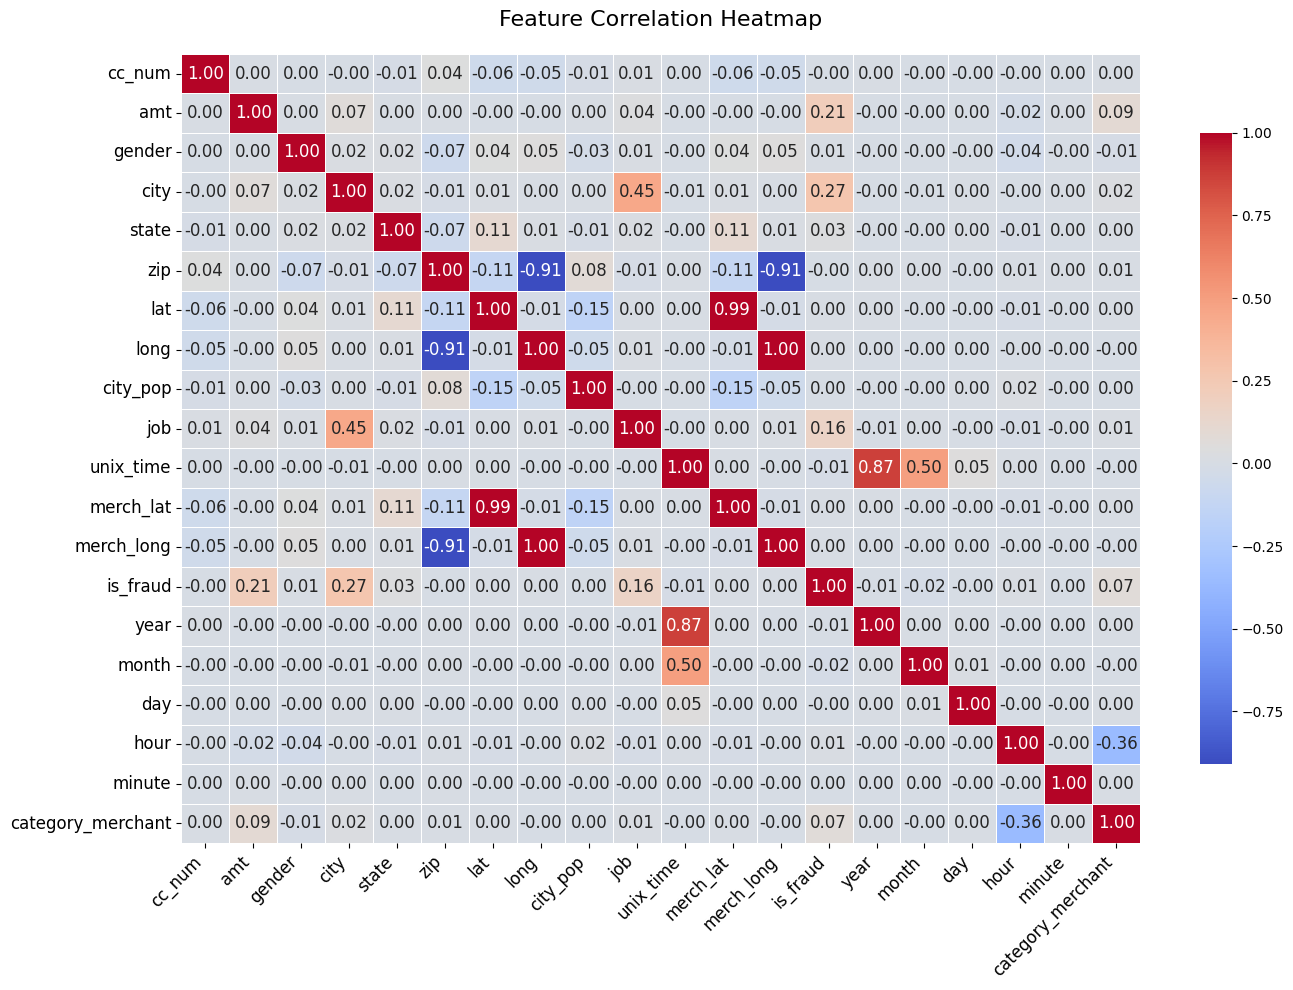

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))  # Increase the figure size for more space
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5,
            fmt='.2f', annot_kws={"size": 12}, cbar_kws={'shrink': 0.8})  # Adjust annotations and colorbar size

# Adjusting the label size and adding space between labels
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and space x-axis labels
plt.yticks(rotation=0, fontsize=12)  # Adjust y-axis labels

# Title with space above
plt.title("Feature Correlation Heatmap", fontsize=16, pad=20)

# Adding extra space around the plot
plt.tight_layout()  # This adjusts the plot to ensure there's no overlap
plt.show()


In [25]:

# Set correlation threshold
threshold = 0.85

# Find feature pairs with high correlation
high_corr_pairs = np.where((correlation_matrix > threshold) & (correlation_matrix < 1))

# Print highly correlated feature pairs
for i, j in zip(high_corr_pairs[0], high_corr_pairs[1]):
    print(f"Feature {df.columns[i]} is highly correlated with Feature {df.columns[j]} (Corr: {correlation_matrix.iloc[i, j]:.2f})")

Feature lat is highly correlated with Feature merch_lat (Corr: 0.99)
Feature long is highly correlated with Feature merch_long (Corr: 1.00)
Feature unix_time is highly correlated with Feature year (Corr: 0.87)
Feature merch_lat is highly correlated with Feature lat (Corr: 0.99)
Feature merch_long is highly correlated with Feature long (Corr: 1.00)
Feature year is highly correlated with Feature unix_time (Corr: 0.87)


In [26]:
# Create a list of columns to drop based on high correlation
drop_columns = ['zip','unix_time','merch_lat','long','lat']

# Drop the highly correlated columns from the train and test datasets
df= df.drop(columns=drop_columns)

In [27]:
legit=df[df.is_fraud == 0]
fraud=df[df.is_fraud == 1]

In [28]:
print(legit.shape)
print(fraud.shape)

(1842743, 15)
(9651, 15)


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Split into features (X) and target (Y)
X = df.drop('is_fraud', axis=1)  # Features
Y = df['is_fraud']  # Target variable

# Step 1: Apply Random Undersampling (Reduce majority class)
undersample = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
X_under, y_under = undersample.fit_resample(X, Y)

# Step 2: Split data into training and testing sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42, stratify=y_under)

# Step 3: Apply SMOTE only to the training set
oversample = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

# Display class distributions
print("Original Data Distribution:", Counter(Y))
print("After Undersampling:", Counter(y_under))
print("After SMOTE on Training Set:", Counter(y_train_resampled))



Original Data Distribution: Counter({0: 1842743, 1: 9651})
After Undersampling: Counter({0: 96510, 1: 9651})
After SMOTE on Training Set: Counter({0: 77207, 1: 38603})


In [30]:
import numpy as np

print("NaN values in X:", np.isnan(X).sum().sum())
print("Inf values in X:", np.isinf(X).sum().sum())


NaN values in X: 0
Inf values in X: 0


In [31]:
df.shape

(1852394, 15)

In [32]:
df.head()

,cc_num,amt,gender,city,state,city_pop,job,merch_long,is_fraud,year,month,day,hour,minute,category_merchant
0,-0.316766,-0.408741,0,-0.073467,-0.289758,-0.282429,-0.162994,0.594463,0,2019,1,1,0,0,1.667679
1,-0.318830,0.233378,0,-0.154340,-0.231334,-0.293527,-0.236126,-2.031915,0,2019,1,1,0,0,0.939167
2,-0.318801,0.942184,1,0.287123,-0.463710,-0.280243,1.407552,-1.593535,0,2019,1,1,0,0,-0.661420
3,-0.316131,-0.157381,1,0.757912,-0.464280,-0.287590,0.021684,-1.623084,0,2019,1,1,0,1,-0.557028
4,-0.318544,-0.176470,1,-0.038507,0.558297,-0.293693,-0.065617,0.842714,0,2019,1,1,0,3,-0.429298


In [33]:
fraud_cases = df[df['is_fraud'] == 1]

# Display the first few fraud ca
fraud_cases.head()

,cc_num,amt,gender,city,state,city_pop,job,merch_long,is_fraud,year,month,day,hour,minute,category_merchant
2449,-0.318827,1.324906,1,-0.079124,-0.289758,-0.291086,0.138289,0.657606,1,2019,1,2,1,6,1.007278
2472,-0.318571,-0.367611,0,-0.090624,-0.350437,4.999057,1.746832,-0.647896,1,2019,1,2,1,47,-0.046311
2523,-0.318571,1.295079,0,-0.090624,-0.350437,4.999057,1.746832,-0.625626,1,2019,1,2,3,5,1.288571
2546,-0.318827,-0.395805,1,-0.079124,-0.289758,-0.291086,0.138289,0.591360,1,2019,1,2,3,38,-0.207798
2553,-0.318571,1.291437,0,-0.090624,-0.350437,4.999057,1.746832,-0.614510,1,2019,1,2,3,55,1.424068


In [34]:
# legit1=df[df.is_fraud == 0]
# fraud1=df[df.is_fraud == 1]

In [35]:
# print(legit1.shape)
# print(fraud1.shape)

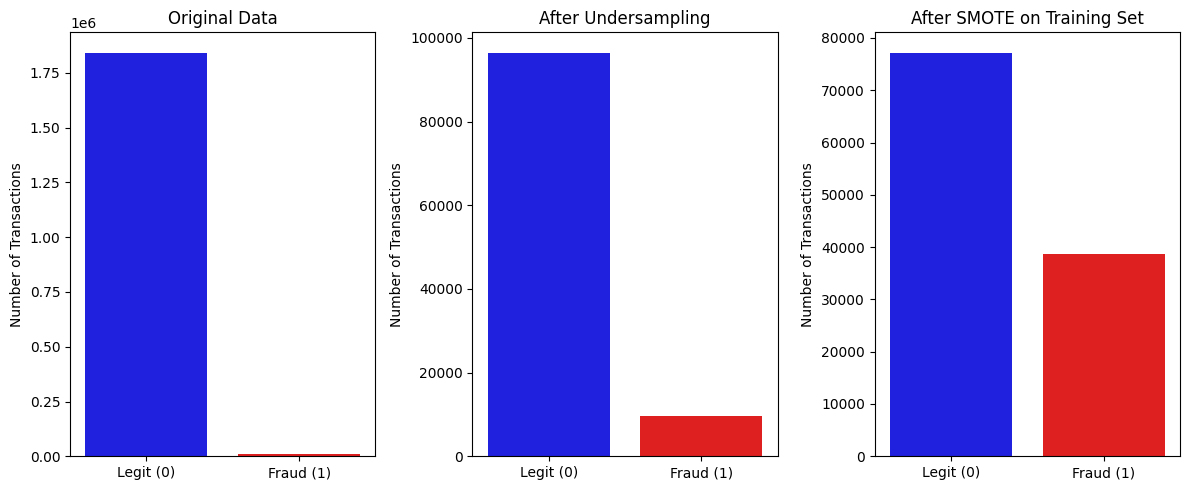

In [36]:


import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Get class distribution before and after resampling
original_counts = Counter(Y)  # Before any resampling
undersampled_counts = Counter(y_under)  # After undersampling
resampled_counts = Counter(y_train_resampled)  # After SMOTE on training set

# Create a figure with 3 subplots
plt.figure(figsize=(12, 5))

# Plot original class distribution
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
sns.barplot(x=list(original_counts.keys()), y=list(original_counts.values()), palette=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['Legit (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.title('Original Data')

# Plot after undersampling
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
sns.barplot(x=list(undersampled_counts.keys()), y=list(undersampled_counts.values()), palette=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['Legit (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.title('After Undersampling')

# Plot after SMOTE
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
sns.barplot(x=list(resampled_counts.keys()), y=list(resampled_counts.values()), palette=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['Legit (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.title('After SMOTE on Training Set')

# Show the plots
plt.tight_layout()
plt.show()



In [37]:
from collections import Counter

# Display class distribution after resampling
print("Training set class distribution (after SMOTE):", Counter(y_train_resampled))
print("Testing set class distribution (unchanged):", Counter(y_test))


Training set class distribution (after SMOTE): Counter({0: 77207, 1: 38603})
Testing set class distribution (unchanged): Counter({0: 19303, 1: 1930})


In [38]:
import numpy as np
import pandas as pd

# Check data shapes
print("Original Training Data Shape:", X_train.shape)
print("Resampled Training Data Shape:", X_train_resampled.shape)
print("Test Data Shape:", X_test.shape)

# Verify if test data appears in training set (data leakage check)
train_rows = set([tuple(row) for row in X_train_resampled.to_numpy()])
test_rows = set([tuple(row) for row in X_test.to_numpy()])
overlap = train_rows.intersection(test_rows)

print("\nNumber of Overlapping Rows Between Train & Test:", len(overlap))
if len(overlap) > 0:
    print(" Data Leakage Detected! Test data exists in training set.")

# Check fraud distribution before and after resampling
print("\nFraud Distribution Before and After Resampling:")
print(f"Original Train Fraud Cases: {sum(y_train == 1)} / {len(y_train)} ({100 * sum(y_train == 1) / len(y_train):.2f}%)")
print(f"Resampled Train Fraud Cases: {sum(y_train_resampled == 1)} / {len(y_train_resampled)} ({100 * sum(y_train_resampled == 1) / len(y_train_resampled):.2f}%)")
print(f"Test Fraud Cases: {sum(y_test == 1)} / {len(y_test)} ({100 * sum(y_test == 1) / len(y_test):.2f}%)")


Original Training Data Shape: (84928, 14)
Resampled Training Data Shape: (115810, 14)
Test Data Shape: (21233, 14)

Number of Overlapping Rows Between Train & Test: 0

Fraud Distribution Before and After Resampling:
Original Train Fraud Cases: 7721 / 84928 (9.09%)
Resampled Train Fraud Cases: 38603 / 115810 (33.33%)
Test Fraud Cases: 1930 / 21233 (9.09%)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# # Load dataset
# X_train_resampled = joblib.load("X_train_resampled.pkl")
# y_train_resampled = joblib.load("y_train_resampled.pkl")
# X_test = joblib.load("X_test.pkl")
# y_test = joblib.load("y_test.pkl")

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Metrics
print("\n Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))



 Logistic Regression Performance:
Accuracy: 0.912259219140018
Precision: 0.5115796750777739
Recall: 0.7668393782383419
F1-score: 0.6137258967447646


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_dt = dt.predict(X_test)

# Metrics
print("\n Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))



 Decision Tree Performance:
Accuracy: 0.9513964112466444
Precision: 0.6811945117029863
Recall: 0.8746113989637305
F1-score: 0.7658802177858439


In [41]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_rf = rf.predict(X_test)

# Metrics
print("\n Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))



 Random Forest Performance:
Accuracy: 0.9656195544671031
Precision: 0.7946954813359528
Recall: 0.8383419689119171
F1-score: 0.815935451336359


In [42]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(
    max_depth=6, learning_rate=0.05, n_estimators=200,
    subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=1,
    eval_metric='logloss', use_label_encoder=False, random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Metrics
print("\n XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost Performance:
Accuracy: 0.9722601610700325
Precision: 0.8200477326968973
Recall: 0.8901554404145078
F1-score: 0.8536645962732919


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


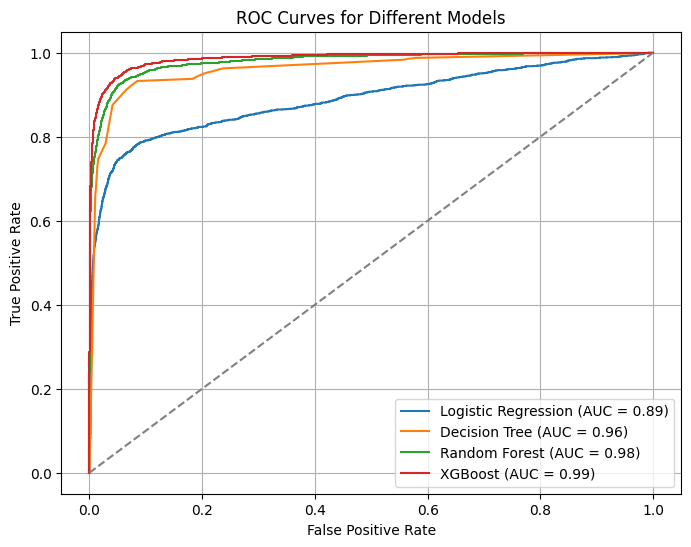


Performance Metrics for All Models:
                     Train Accuracy  Test Accuracy  Precision    Recall  \
Logistic Regression        0.878197       0.912259   0.511580  0.766839   
Decision Tree              0.930412       0.951396   0.681195  0.874611   
Random Forest              0.953346       0.965620   0.794695  0.838342   
XGBoost                    0.973327       0.972260   0.820048  0.890155   

                     F1-score       AUC  
Logistic Regression  0.613726  0.889027  
Decision Tree        0.765880  0.961727  
Random Forest        0.815935  0.979673  
XGBoost              0.853665  0.986987  


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib

# # Load dataset (Ensure that the training set used is the resampled one)
# X_train_resampled = joblib.load("X_train_resampled.pkl")  # Resampled training data
# y_train_resampled = joblib.load("y_train_resampled.pkl")  # Resampled training labels
# X_test = joblib.load("X_test.pkl")  # Original test set (untouched)
# y_test = joblib.load("y_test.pkl")  # Original test labels

# Define optimized models to prevent overfitting
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "XGBoost": XGBClassifier(
        max_depth=6, learning_rate=0.05, n_estimators=200,
        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=1,
        eval_metric='logloss', use_label_encoder=False, random_state=42
    )
}

# Dictionary to store results
results = {}

# Plot ROC Curve
plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Train model using the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on the training set (for accuracy comparison)
    y_train_pred = model.predict(X_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Predict probabilities for ROC AUC calculation
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute evaluation metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Compute ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Store results
    results[name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC": roc_auc
    }

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Finalize ROC Curve plot
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.grid()
plt.show()

# Print the results in a structured way
print("\nPerformance Metrics for All Models:")
results_df = pd.DataFrame(results).T
print(results_df)


In [44]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=502a8c34eff2c4be64886c4a4a8084a843545fb65a2ed017d9cdb7b6feff7ab0
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [45]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

In [46]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                                   feature_names=X_train.columns.values,
                                                   discretize_continuous=False,
                                                   class_names=["legit", "fraud"],
                                                   mode="classification",
                                                   verbose=True,
                                                   random_state=45)

In [47]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import lime.lime_tabular
import shap
import matplotlib.pyplot as plt
import joblib
from IPython.display import display, FileLink

# Load trained model & data
# xgb_model = joblib.load("xgb_model.pkl")  # Replace with actual model file
# X_train = joblib.load("X_train.pkl")  # Load training data structure

# Feature names
features = X_train.columns.tolist()

def get_user_input():
    print("\nEnter values for the following features, separated by commas:")
    print(", ".join(features))

    user_input = input("\nEnter values: ")
    values = user_input.split(",")

    if len(values) != len(features):
        print(f"Error: Expected {len(features)} values, but got {len(values)}.")
        return None

    try:
        user_data = pd.DataFrame([list(map(float, values))], columns=features)
    except ValueError:
        print("Error: Ensure all inputs are numeric.")
        return None

    return user_data

# Get user input
user_sample = get_user_input()

if user_sample is not None:
    # Ensure input matches training data format
    user_sample = user_sample[X_train.columns]

    # Predict fraud probability
    fraud_probability = xgb_model.predict_proba(user_sample)[0][1]  # Probability of fraud
    threshold = 0.5  # Adjust threshold if needed
    prediction = 1 if fraud_probability > threshold else 0

    print(f"\nFraud Probability: {fraud_probability:.4f}")
    print("THE TRANSACTION OUTCOME IS:", "FRAUD" if prediction == 1 else "NOT FRAUD")
    print("\n")

    # LIME Explanation
    explainer_lime = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=X_train.columns.values,
        discretize_continuous=True,
        class_names=["legit", "fraud"],
        mode="classification",
        verbose=True,
        random_state=45
    )

    exp_lime = explainer_lime.explain_instance(user_sample.iloc[0], xgb_model.predict_proba)

    # Save LIME explanation to HTML
    lime_html_file = "lime_explanation.html"
    exp_lime.save_to_file(lime_html_file)
    print(f"LIME explanation saved as {lime_html_file}")

    # Provide download link
    display(FileLink(lime_html_file))



Enter values for the following features, separated by commas:
cc_num, amt, gender, city, state, city_pop, job, merch_long, year, month, day, hour, minute, category_merchant

Enter values: -0.318827,1.324906,1,-0.079124,-0.289758,-0.291086,0.138289,0.657606,2019,1,2,1,6,1.007278

Fraud Probability: 0.9872
THE TRANSACTION OUTCOME IS: FRAUD


Intercept 0.14272513400721448
Prediction_local [0.5761309]
Right: 0.9871775
LIME explanation saved as lime_explanation.html


/content/lime_explanation.html


Enter values for the following features, separated by commas:
cc_num, amt, gender, city, state, city_pop, job, merch_long, year, month, day, hour, minute, category_merchant

Enter values: -0.318827,1.324906,1,-0.079124,-0.289758,-0.291086,0.138289,0.657606,2019,1,2,1,6,1.007278

Fraud Probability: 0.9872
THE TRANSACTION OUTCOME IS: FRAUD


Intercept 0.14272513400721448
Prediction_local [0.5761309]
Right: 0.9871775


<Figure size 800x400 with 0 Axes>

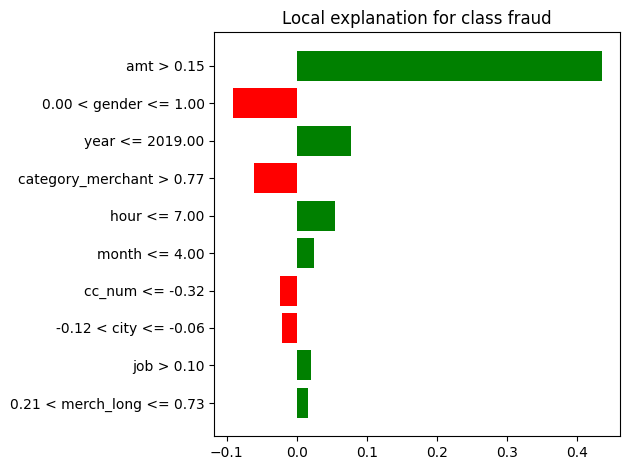

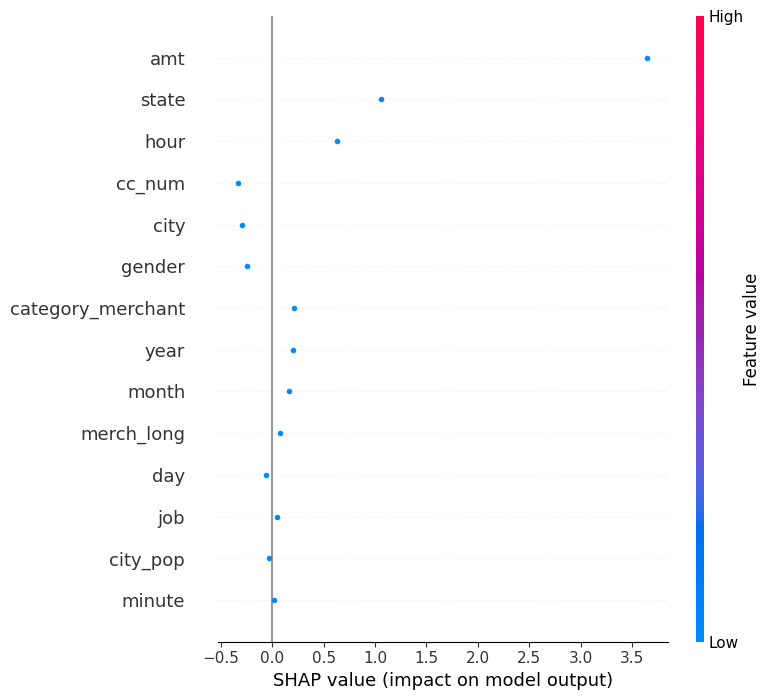

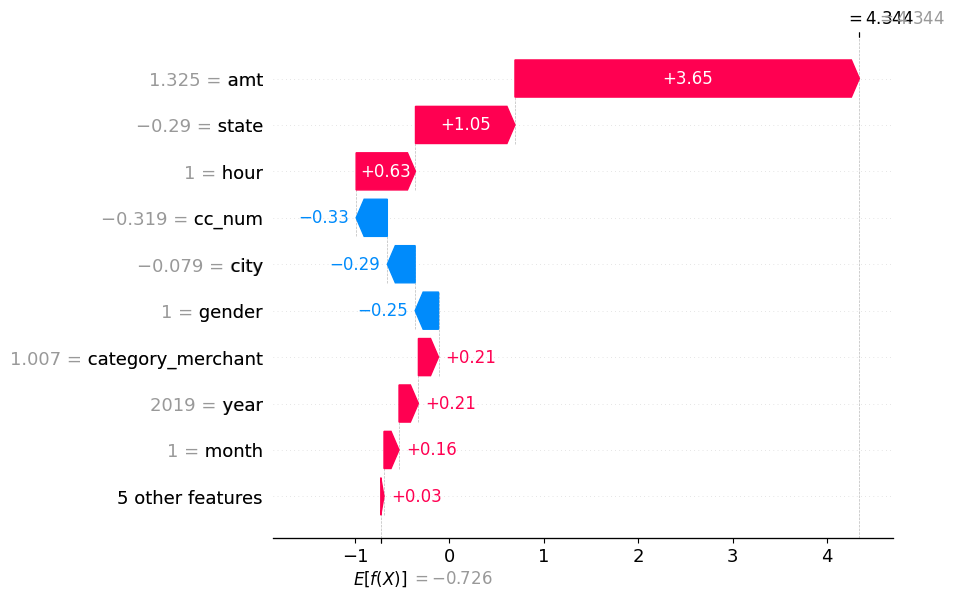

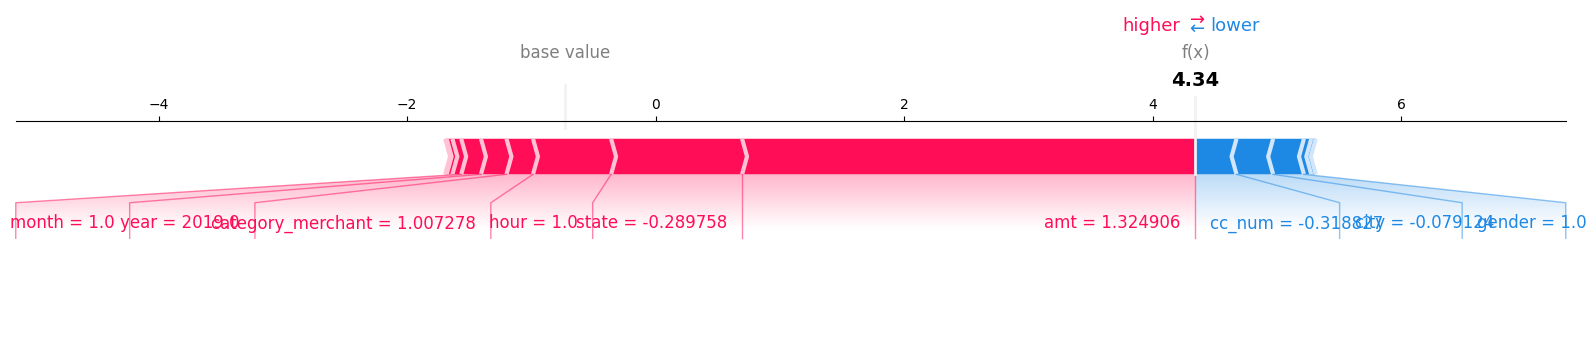

In [48]:

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

# import numpy as np
# import pandas as pd
# import lime.lime_tabular
# import shap
# import matplotlib.pyplot as plt
# import joblib
# from IPython.display import display

# # Load trained model & data
# # xgb_model = joblib.load("xgb_model.pkl")  # Replace with actual model file
# # X_train = joblib.load("X_train.pkl")  # Load training data structure

# # Feature names
# features = X_train.columns.tolist()

# def get_user_input():
#     print("\nEnter values for the following features, separated by commas:")
#     print(", ".join(features))

#     user_input = input("\nEnter values: ")
#     values = user_input.split(",")

#     if len(values) != len(features):
#         print(f"Error: Expected {len(features)} values, but got {len(values)}.")
#         return None

#     try:
#         user_data = pd.DataFrame([list(map(float, values))], columns=features)
#     except ValueError:
#         print("Error: Ensure all inputs are numeric.")
#         return None

#     return user_data

# # Get user input
# user_sample = get_user_input()

# if user_sample is not None:
#     # Ensure input matches training data format
#     user_sample = user_sample[X_train.columns]

#     # Predict fraud probability
#     fraud_probability = xgb_model.predict_proba(user_sample)[0][1]  # Probability of fraud
#     threshold = 0.5  # Adjust threshold if needed
#     prediction = 1 if fraud_probability > threshold else 0

#     print(f"\nFraud Probability: {fraud_probability:.4f}")
#     print("THE TRANSACTION OUTCOME IS:", "FRAUD" if prediction == 1 else "NOT FRAUD")
#     print("\n")

#     # LIME Explanation
#     explainer_lime = lime.lime_tabular.LimeTabularExplainer(
#         training_data=X_train.values,
#         feature_names=X_train.columns.values,
#         discretize_continuous=True,
#         class_names=["legit", "fraud"],
#         mode="classification",
#         verbose=True,
#         random_state=45
#     )

#     exp_lime = explainer_lime.explain_instance(user_sample.iloc[0], xgb_model.predict_proba)
#     display(exp_lime.show_in_notebook(show_table=True))
#     print("\n")

#     exp_lime.as_pyplot_figure()
#     plt.show()
#     print("\n")

#     # SHAP Explanation
#     explainer_shap = shap.TreeExplainer(xgb_model)
#     shap_values = explainer_shap(user_sample)

#     # SHAP Summary Plot
#     shap.summary_plot(shap_values, user_sample, feature_names=features, show=False)
#     plt.show()
#     print("\n")

#     # SHAP Waterfall Plot
#     shap.plots.waterfall(shap_values[0], show=False)
#     plt.show()
#     print("\n")

#     # SHAP Force Plot
#     shap.force_plot(explainer_shap.expected_value, shap_values.values[0], user_sample.iloc[0], matplotlib=True)
#     plt.show()
#     print("\n")




import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import lime.lime_tabular
import shap
import matplotlib.pyplot as plt
import joblib
from IPython.display import display, HTML

# Load trained model & data
# xgb_model = joblib.load("xgb_model.pkl")  # Replace with actual model file
# X_train = joblib.load("X_train.pkl")  # Load training data structure

# Feature names
features = X_train.columns.tolist()

def get_user_input():
    print("\nEnter values for the following features, separated by commas:")
    print(", ".join(features))

    user_input = input("\nEnter values: ")
    values = user_input.split(",")

    if len(values) != len(features):
        print(f"Error: Expected {len(features)} values, but got {len(values)}.")
        return None

    try:
        user_data = pd.DataFrame([list(map(float, values))], columns=features)
    except ValueError:
        print("Error: Ensure all inputs are numeric.")
        return None

    return user_data

# Get user input
user_sample = get_user_input()

if user_sample is not None:
    # Ensure input matches training data format
    user_sample = user_sample[X_train.columns]

    # Predict fraud probability
    fraud_probability = xgb_model.predict_proba(user_sample)[0][1]  # Probability of fraud
    threshold = 0.5  # Adjust threshold if needed
    prediction = 1 if fraud_probability > threshold else 0

    print(f"\nFraud Probability: {fraud_probability:.4f}")
    print("THE TRANSACTION OUTCOME IS:", "FRAUD" if prediction == 1 else "NOT FRAUD")
    print("\n")

    # LIME Explanation
    explainer_lime = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=X_train.columns.values,
        discretize_continuous=True,
        class_names=["legit", "fraud"],
        mode="classification",
        verbose=True,
        random_state=45
    )

    exp_lime = explainer_lime.explain_instance(user_sample.iloc[0], xgb_model.predict_proba)

    # Display explanation and feature importance together
    html = exp_lime.as_html()  # Get HTML version
    display(HTML(html))  # Display inline in Jupyter Notebook

    # Reduce spacing between table & explanation
    plt.figure(figsize=(8, 4))  # Adjust figure size
    exp_lime.as_pyplot_figure()
    plt.tight_layout()  # Reduce extra space
    plt.show()

    print("\n")

    # SHAP Explanation
    explainer_shap = shap.TreeExplainer(xgb_model)
    shap_values = explainer_shap(user_sample)

    # SHAP Summary Plot
    shap.summary_plot(shap_values, user_sample, feature_names=features, show=False)
    plt.show()
    print("\n")

    # SHAP Waterfall Plot
    shap.plots.waterfall(shap_values[0], show=False)
    plt.show()
    print("\n")

    # SHAP Force Plot
    shap.force_plot(explainer_shap.expected_value, shap_values.values[0], user_sample.iloc[0], matplotlib=True)
    plt.show()
    print("\n")


In [49]:
# -0.318827,1.324906,1,-0.079124,-0.289758,-0.291086,0.138289,0.657606,2019,1,2,1,6,1.007278 (fraud)
# -0.316766,-0.408741,0,-0.073467,-0.289758,-0.282429,-0.162994,0.594463,2019,1,1,0,0,1.667679 (legitimate)

In [50]:
import shap

In [51]:
print(X_test.shape)
print(X_train.shape)
# resampled_df.shape

(21233, 14)
(84928, 14)


In [52]:
# shap.summary_plot(shap_values, X_display, plot_type="bar")
explainer = shap.TreeExplainer(xgb_model)

In [53]:
shap_values.shape

(1, 14)

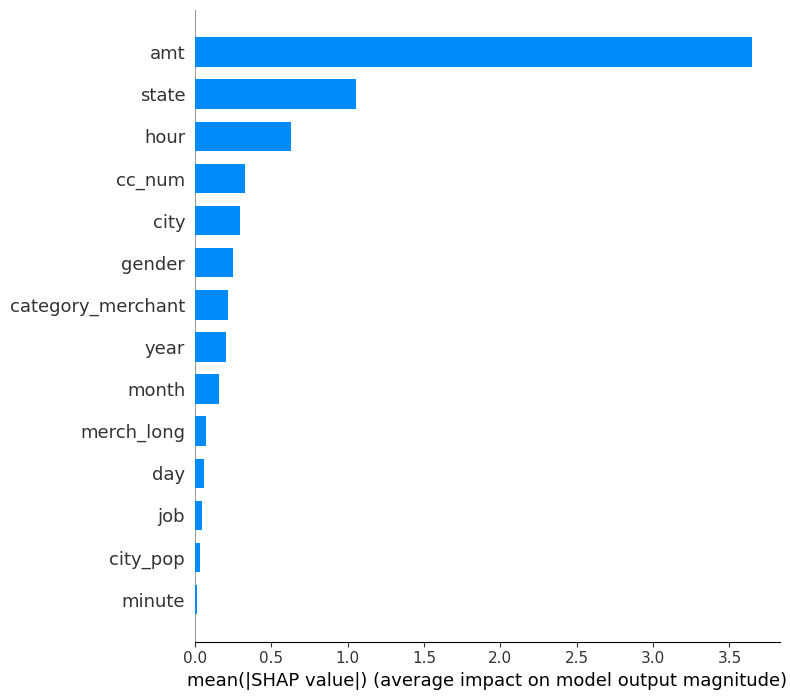

In [54]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [55]:
# Ensure feature names are taken from the DataFrame
feature_names = X_train.columns.tolist()  # Extract feature names
feature_names

['cc_num',
 'amt',
 'gender',
 'city',
 'state',
 'city_pop',
 'job',
 'merch_long',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'category_merchant']

In [56]:
import shap

# Initialize SHAP
shap.initjs()

# Convert X_test to DataFrame (if not already)
X_display = pd.DataFrame(X_test, columns=feature_names)

# Ensure explainer returns SHAP values in the correct format
shap_values = explainer(X_test)  # Generate SHAP values properly



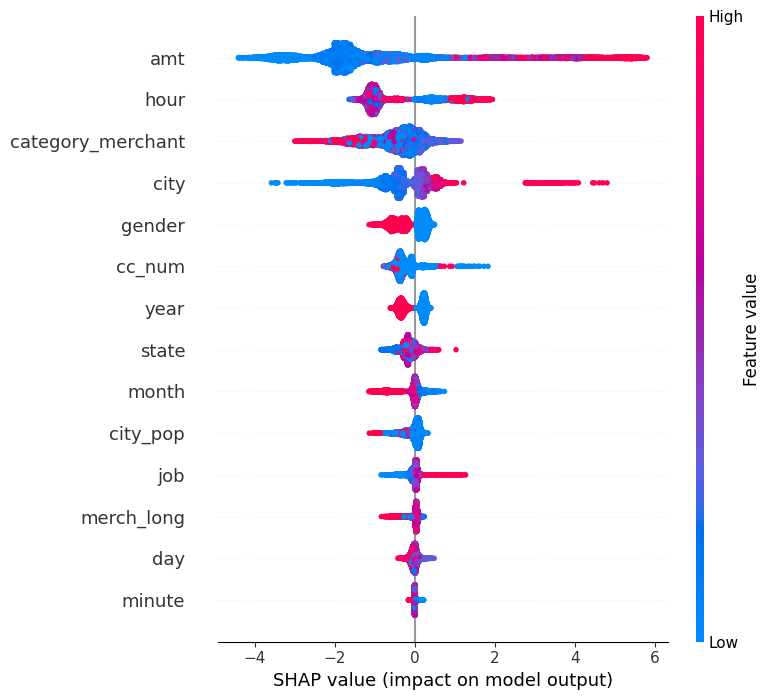

In [57]:
shap.summary_plot(shap_values, X_display)


In [58]:
# import joblib

# # Save the resampled training data
# joblib.dump(X_train_resampled, "X_train_resampled.pkl")
# joblib.dump(y_train_resampled, "y_train_resampled.pkl")

# # Save the original test set
# joblib.dump(X_test, "X_test.pkl")
# joblib.dump(y_test, "y_test.pkl")


In [59]:
import pickle

# Save the trained model (e.g., xgb_model)
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)


In [60]:
from google.colab import files

# Download the file
files.download('xgb_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
import joblib

joblib.dump(X_train, "X_train.pkl")
joblib.dump(feature_names, "feature_columns.pkl")

['feature_columns.pkl']